In [2]:
import fitz as mupdf
import numpy as np
import pytesseract as tess
import matplotlib.pyplot as plt
import skimage.transform as skt
import skimage.feature as skf
import skimage.filters as skl
import math
import os


In [3]:
print(mupdf.__doc__)

PyMuPDF 1.14.3: Python bindings for the MuPDF 1.14.0 library,
built on 2018-12-01 18:33:20


In [4]:
filename = "../training_set/MAX RICH GROUP LIMITED.pdf"
doc = mupdf.open(filename) 
pageCount = doc.pageCount
print("pageCount: " + str(pageCount))
print("First page:")
print(doc[0].getText())
print("Third page:")
print(doc[2].getText())

pageCount: 21
First page:
BVIPTEBC 2007/01/41(PVNOC) 
 
BVI COMPANY NUMBER: 1415455�� 
 
 
 
TERRITORY OF THE BRITISH VIRGIN ISLANDS 
THE BVI BUSINESS COMPANIES ACT, 2004 
 
 
 
 
MEMORANDUM AND ARTICLES 
 
 
OF ASSOCIATION 
 
 
OF 
 
 
MAX RICH GROUP LIMITED 
 
 
 
 
 
 
A COMPANY LIMITED BY SHARES 
 
 
 
 
Incorporated on the 5th day of July, 2007 
 
 
 
 
 
INCORPORATED IN THE BRITISH VIRGIN ISLANDS 
 
 

Third page:
BVIPTEBC 2007/01/41(PVNOC) 
- 2 -  
 
 
“Resolution of Shareholders” means either: 
 
 
(a)  
a resolution approved at a duly convened and constituted meeting of the Shareholders of the 
Company by the affirmative vote of a majority of in excess of 50 percent of the votes of the Shares 
entitled to vote thereon which were present at the meeting and were voted; or 
 
 
(b)  
a resolution consented to in writing by a majority of in excess of 50 percent of the votes of Shares 
entitled to vote thereon; 
 
 
“Seal” means any seal which has been duly adopted as the common se

In [5]:
filename = "../training_set/GRAND CONCORD INTERNATIONAL HOLDINGS LIMITED - BAD SCAN.pdf"
doc = mupdf.open(filename) 
pageCount = doc.pageCount
print("pageCount: " + str(pageCount))
print("First page:")
print(doc[0].getText())
print("Third page:")
print(doc[2].getText())

pageCount: 54
First page:

Third page:



3960 3060


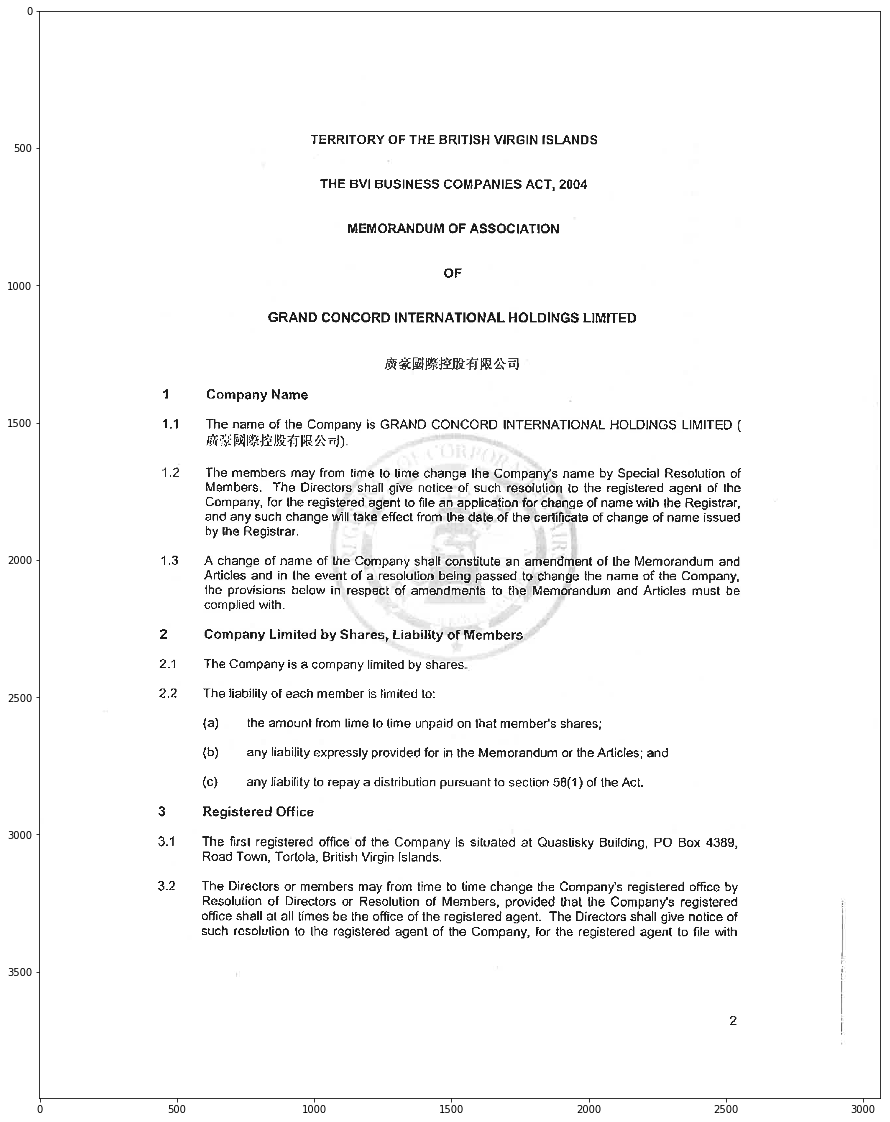

In [6]:
### exercise what does 300 dpi mean?
zoomMatrix = mupdf.Matrix(5, 5) #zoom factor, the default resolution is too small
pix = doc[4].getPixmap(matrix = zoomMatrix, colorspace = "GRAY", alpha = False)
img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width)
print(pix.height, pix.width) # minimum should be 2480 x 3508
plt.figure(figsize = (20,20))
plt.imshow(img, cmap='gray')






In [8]:
#don't assume tesseract is in PATH
#pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
#tess.pytesseract.tesseract_cmd = r'c:\Users\Mitz\AppData\Local\Tesseract-OCR\tesseract.exe' 
localappdata = os.getenv('LOCALAPPDATA')
tess.pytesseract.tesseract_cmd = localappdata + r'\Tesseract-OCR\tesseract.exe' 
 
extracted = tess.image_to_string(img, lang='eng')
print(extracted)

1.1

1.2

1.3

2.1

2.2

3.2

TERRITORY OF THE BRITISH VIRGIN ISLANDS
THE BVI BUSINESS COMPANIES ACT, 2004
MEMORANDUM OF ASSOCIATION
OF

GRAND CONCORD INTERNATIONAL HOLDINGS LIMITED

Bee BETS BA BR
Company Name

The name of the Company is GRAND CONCORD INTERNATIONAL HOLDINGS LIMITED (
RAE ERB BE FF BAL ZS F7]).

The members may from time to time change the Company's name by Special Resolution of
Members. The Directors shall give notice of such resolution to the registered agent of the
Company, for ihe registered agent to file an application for change of name with the Registrar,

and any such change will take effect from the date of the certificate of change of name issued
by the Registrar.

A change of name of the Company shall constitute an amendment of the Memorandum and
Articles and in the event of a resolution being passed to change the name of the Company,
the provisions below in respect of amendments to the Memorandum and Articles must be
complied with.

Company Limited by Share

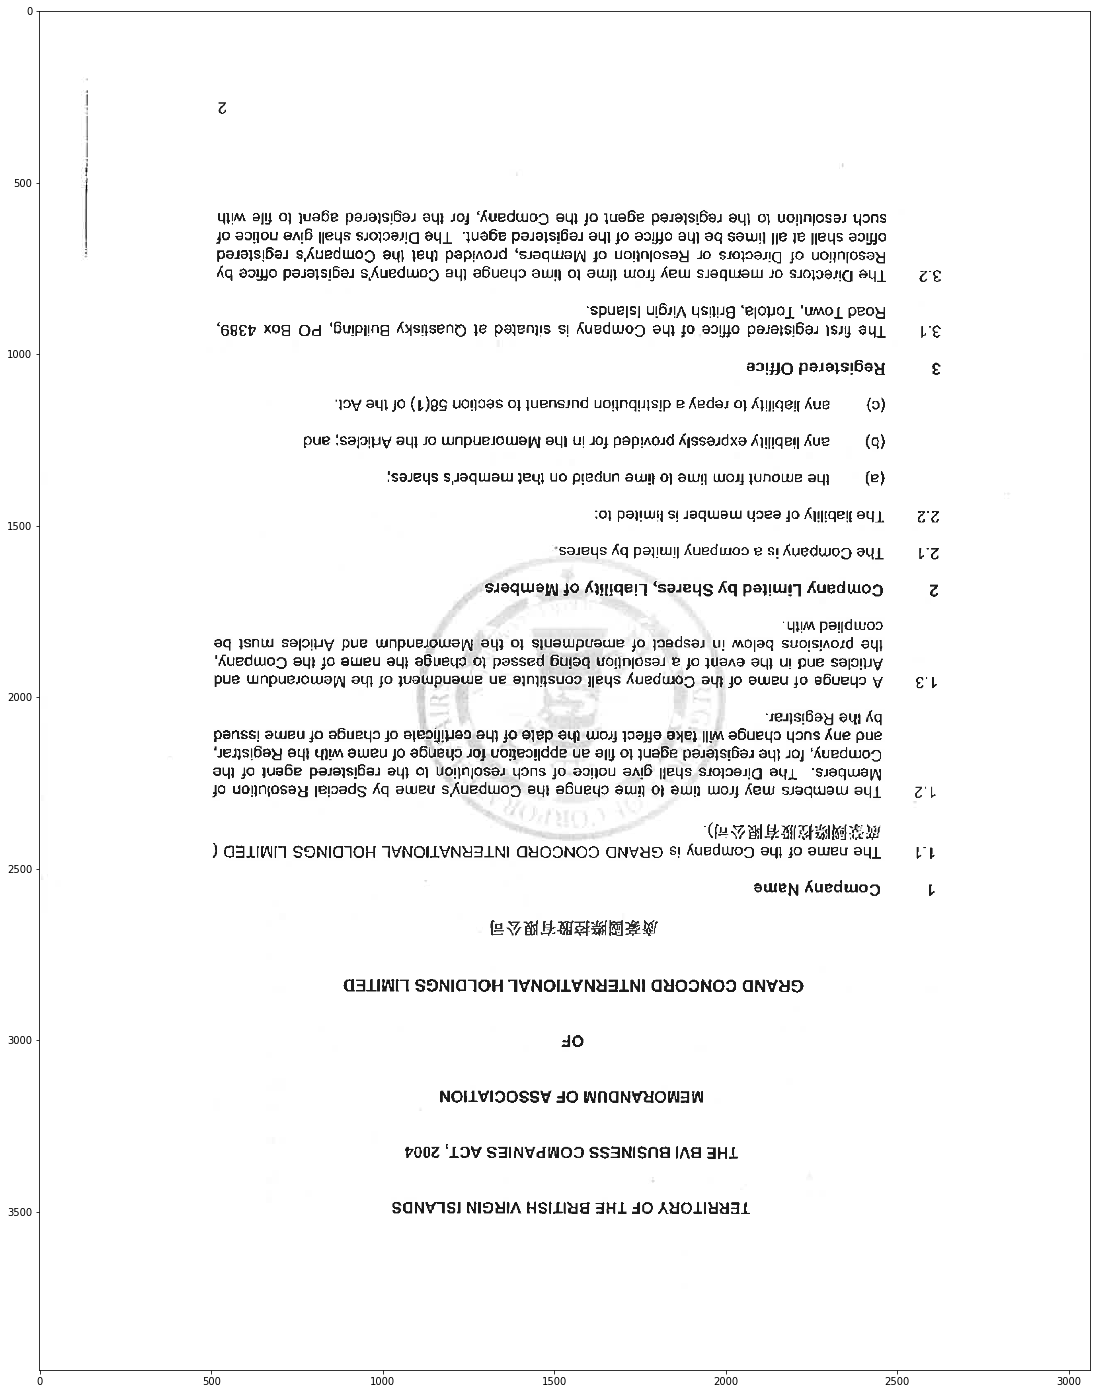

In [9]:
#upside down page
upsideDown = skt.rotate(img, 180, resize=True, preserve_range=True)
plt.figure(figsize = (25,25))
plt.imshow(upsideDown, aspect='equal', cmap='gray')

In [10]:
extracted = tess.image_to_string(upsideDown, lang='eng')
print(extracted)

UUM ajlj 0) juabe pass)sibas ayy Joy ‘Auedwiog ey} Jo juebe pesejsi6as ay} 0} UONN|OsaJ Yyons
jo aonou ear |jeys siojsez1g ay, ‘jUdbe pasajsiBa ay] Jo aoyjo ay) 9q Sow!) {je Je |eUsS aoiyo
passjsibas sAuedwoy ay) yey) papiAosd ‘sJaquial\y JO UOIINJOSAY JO Sfo}oazIG JO UONN[OSay
Aq aojo passjsibes sAuedwog ay) aBueyo awy 0} aw] wos ACW SISQUIALU JO SIOWIeIC) AYU]

“spue|s| UGA Yshiig ‘ejoyol ‘umo] PEOY
‘eBEP KOG Od ‘Buipjing Aysyseny je payens si Auedwoy au} so soyjo pasaysiBa, ysuy Sy

aslo passajsibey

‘JOY Sy] JO (L)gG UdNOaS OC} JUeNSINd UONqUIsIP e Aedaz oO} Ayyiqey Aue {9)

PUR ‘SajIIPYy aU] JO WNPUBIOWAyy Sty) Ul JO, PaplAosd Assaudxa Aqyiqes Aue (q)

‘SOJEYS SJOQLUEW Jey UO prledun Su O} Aw] Woy JUNOWe au} (e}

10} PON] S| JAqQUIALU Yoee Jo Apiqely oy)

‘sareys Aq payiwi| Auedwoo e si Auedwoy ayy

SISQWIIA) JO Aysiqer] ‘saszeys Aq pay] Auedwoy

“UY paljd wos

aq JSNW sell pue WNPUBJOWSsyy By) 0} sJUsWpPUeWwe jo jaedseJ Ul MOjaq SUOISIAOsd SU}
‘Auedwog oy} jo aweu ay} aBueya Oo};

In [13]:
#Orientation and script detection is part of Tesseract configuration
extracted = tess.image_to_string(upsideDown, lang='eng', config='--psm 1')
print(extracted)

1.1

1.2

1.3

2.1

2.2

3.2

TERRITORY OF THE BRITISH VIRGIN ISLANDS
THE BVI BUSINESS COMPANIES ACT, 2004
MEMORANDUM OF ASSOCIATION
OF

GRAND CONCORD INTERNATIONAL HOLDINGS LIMITED

Be ae EIS BA BRS a]
Company Name

The name of the Company is GRAND CONCORD INTERNATIONAL HOLDINGS LIMITED (
RAE ER BEA BEF BEL ZS Fa).

The members may from time to time change the Company's name by Special Resolution of
Members. The Directors shall give notice of such resolution to the registered agent of the
Company, for the registered agent to file an application for change of name with the Registrar,

and any such change will take effect from the date of the certificate of change of name issued
by the Registrar.

A change of name of the Company shall constitute an amendment of the Memorandum and
Articles and in the event of a resolution being passed to change the name of the Company,
the provisions below in respect of amendments to the Memorandum and Articles must be
complied with.

Company Limited by 

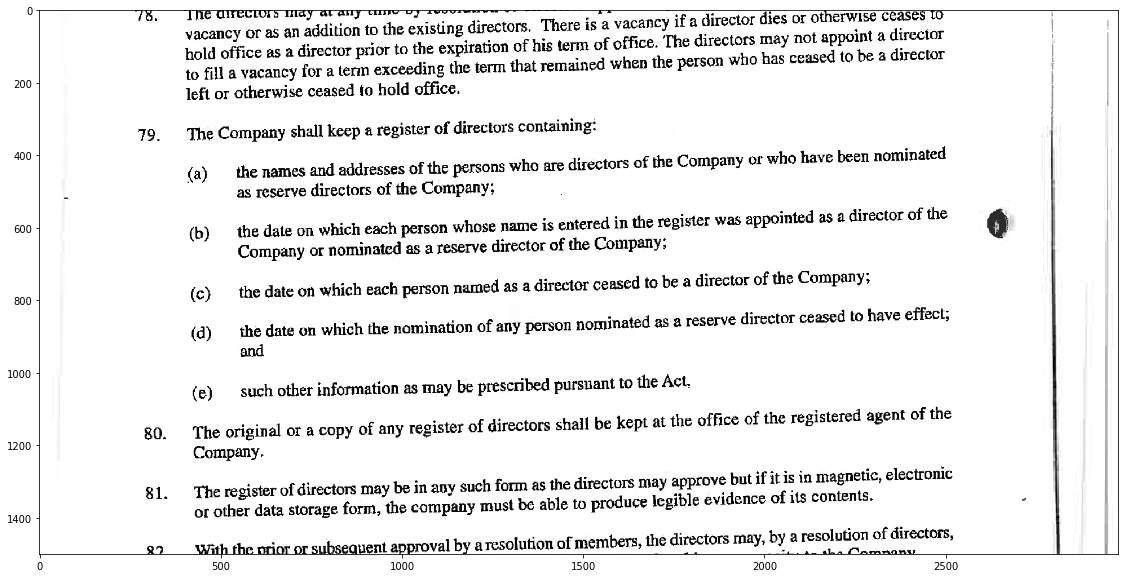

In [14]:
#rotation is not part of orientation detection though
filename = "../testing_set/SPARKLE ROLL HOLDINGS LIMITED - BAD SCAN.pdf"
doc = mupdf.open(filename) 
zoomMatrix = mupdf.Matrix(5, 5) #zoom factor, the default resolution is too small
pix = doc[14].getPixmap(matrix = zoomMatrix, colorspace = "GRAY", alpha = False)
img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width)
plt.figure(figsize = (20,10))
plt.imshow(img[1000:2500, 0:3000], aspect='equal', cmap='gray')

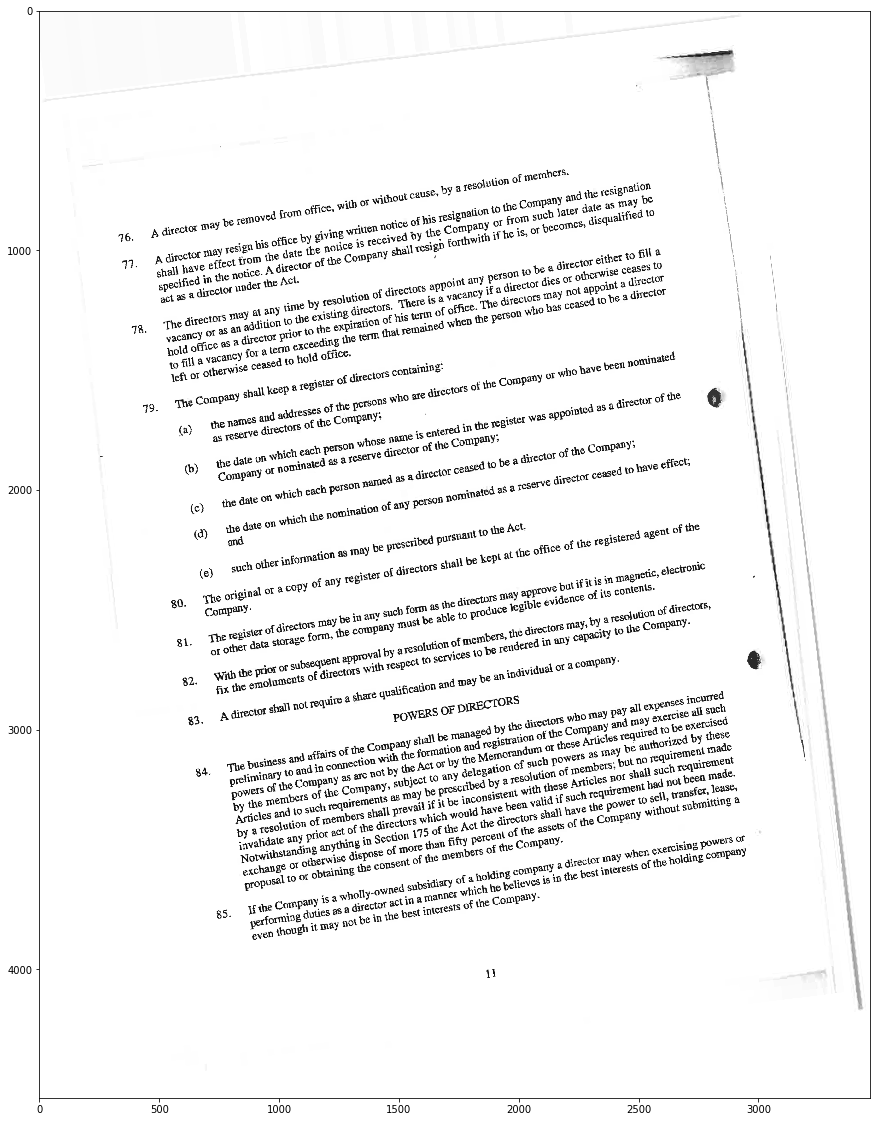

In [15]:
rotated = skt.rotate(img, 7, resize=True, preserve_range=True, mode="edge")
plt.figure(figsize = (20,20))
plt.imshow(rotated, aspect='equal', cmap='gray')

In [16]:
### exercise : which rotation angle makes the recognition completely break down

extracted = tess.image_to_string(rotated, lang='eng', config='--psm 1')
print(extracted)

16. & director may be removed from office, with of without cause, DY # sesolution of membess-
17. A girector may resign bis office bY giving written notice o signal o the Company 4" e resignation
shall have effect from the date the notice 15 received bY e Company x fro) ch later date as may
specified in the notice. director of the Company shall resig® forthwith if he is, OF becom aisqualified to
act as 4 director under the Act. ‘
4%, The directors MAY at any ume by resolution of directors appoint any person to director © er to fill a
acancy © ddition to the €x! sectors. There ig a vacancy if a director dies or othe eases 10
pold office director Prot to the exp? ti ss term of office- The directors may not apP «nt a director
to fill 2 cy for al ceeding th mained when the rson WOO has ceased to pe a director
left oF otherwise sed t old office
79, ‘The Company shall keep * register of directors containing
(a) the names and addresses of the persons who are directors of the Company of who ha

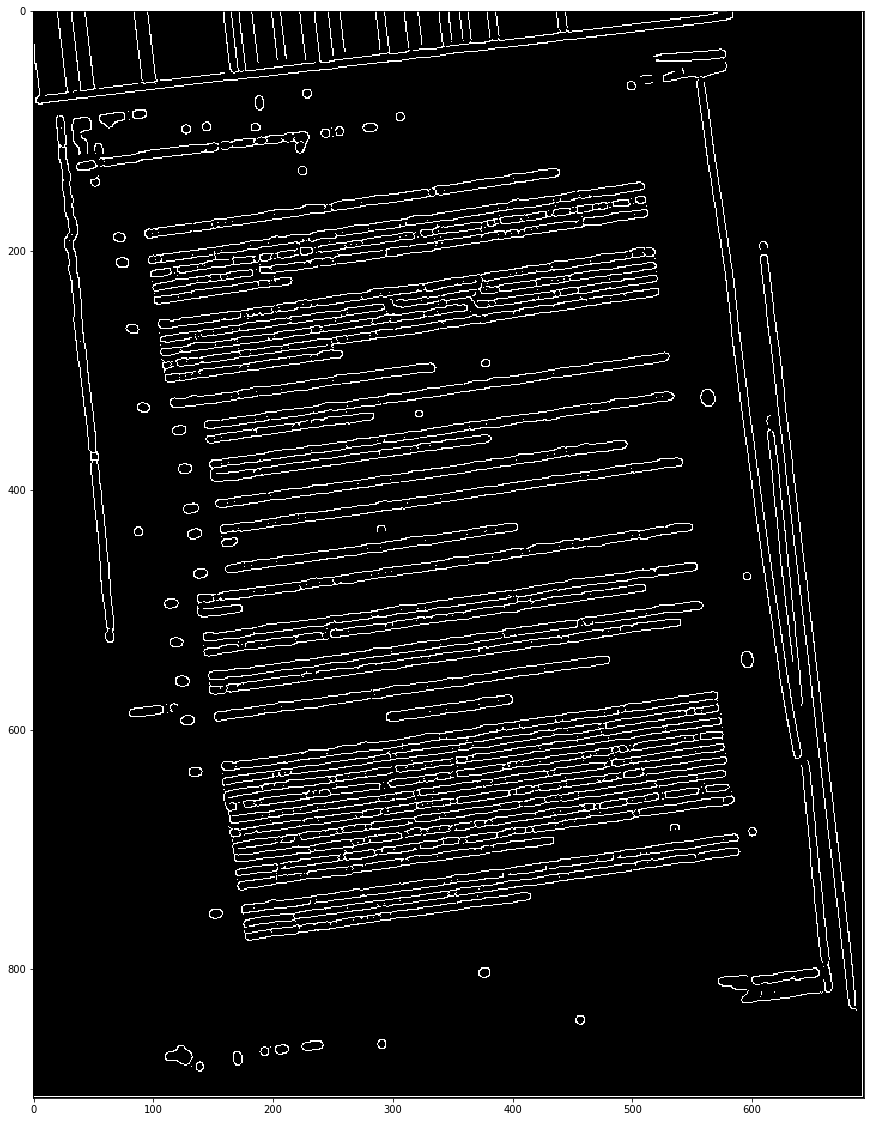

In [17]:
#Hough transform to detect rotation
small_img = skt.downscale_local_mean(rotated,(5,5))
edges = skf.canny(small_img, 3)
plt.figure(figsize = (20,20))
plt.imshow(edges, aspect='equal', cmap='gray')


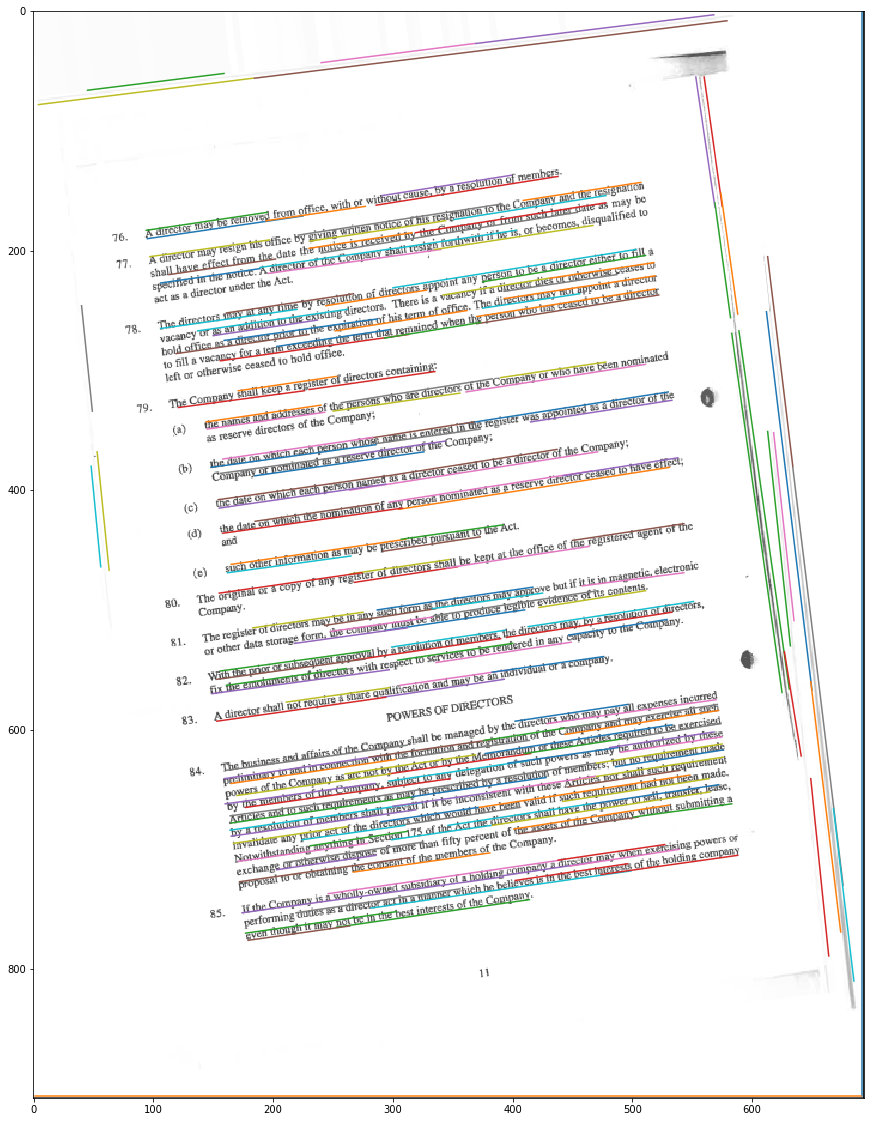

In [18]:
lines = skt.probabilistic_hough_line(edges, threshold=100, line_length=80, line_gap=4)
plt.figure(figsize = (20,20))
plt.imshow(small_img, aspect='equal', cmap='gray')
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

In [19]:
###exercise find the correct rotation angle
angles=[]
for line in lines:
    p0, p1 = line
    angles.append(90+math.degrees(math.atan2(p0[0]-p1[0], p0[1]-p1[1])))
angles


[90.0,
 0.0,
 97.99592044604016,
 97.90716270295846,
 6.876830737436791,
 6.928554034505581,
 7.125016348901795,
 96.86219351566528,
 7.006799640080544,
 96.7329213268596,
 96.85707233409927,
 96.82115236478435,
 97.96961039432136,
 95.78724296403152,
 98.35075253233141,
 96.84277341263095,
 96.17992424918312,
 8.695502877424772,
 95.76788889791415,
 8.130102354155966,
 8.337444438846731,
 8.702223789946785,
 7.001267557495339,
 7.976768787526623,
 8.315125756791886,
 8.130102354155966,
 8.212780189285894,
 95.83949231151745,
 8.55555824341289,
 8.949458084208871,
 7.839263331805427,
 8.803305640729363,
 8.182522997821394,
 7.96961039432135,
 7.8355251064885465,
 8.972626614896384,
 8.746162262555202,
 7.94347181059041,
 7.94347181059041,
 8.530765609948133,
 8.746162262555202,
 8.775055744479673,
 7.744710546422908,
 8.32565033042684,
 8.880659150520245,
 7.806400829235756,
 8.042894233505308,
 8.47114463301483,
 8.403371090560825,
 8.426969021480673,
 8.820379552021052,
 8.5959114369

In [20]:
np.histogram(angles)

(array([173,   0,   0,   0,   0,   0,   0,   0,   0,  19], dtype=int64),
 array([ 0.        ,  9.91416402, 19.82832804, 29.74249207, 39.65665609,
        49.57082011, 59.48498413, 69.39914816, 79.31331218, 89.2274762 ,
        99.14164022]))

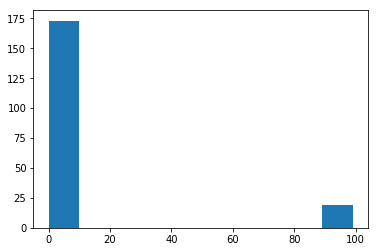

In [21]:
(counts, bins, patches) = plt.hist(angles)

In [22]:
maxbinindex = np.argmax(counts[0:4]) #chapter end pages may have only a few lines of text
binmin = bins[maxbinindex]
binmax = bins[maxbinindex + 1]
filteredAngles = [a for a in angles if a >= binmin and a < binmax]
len(filteredAngles)

173

In [23]:
correctionAngle = np.mean(filteredAngles)
correctionAngle

8.278030776389963

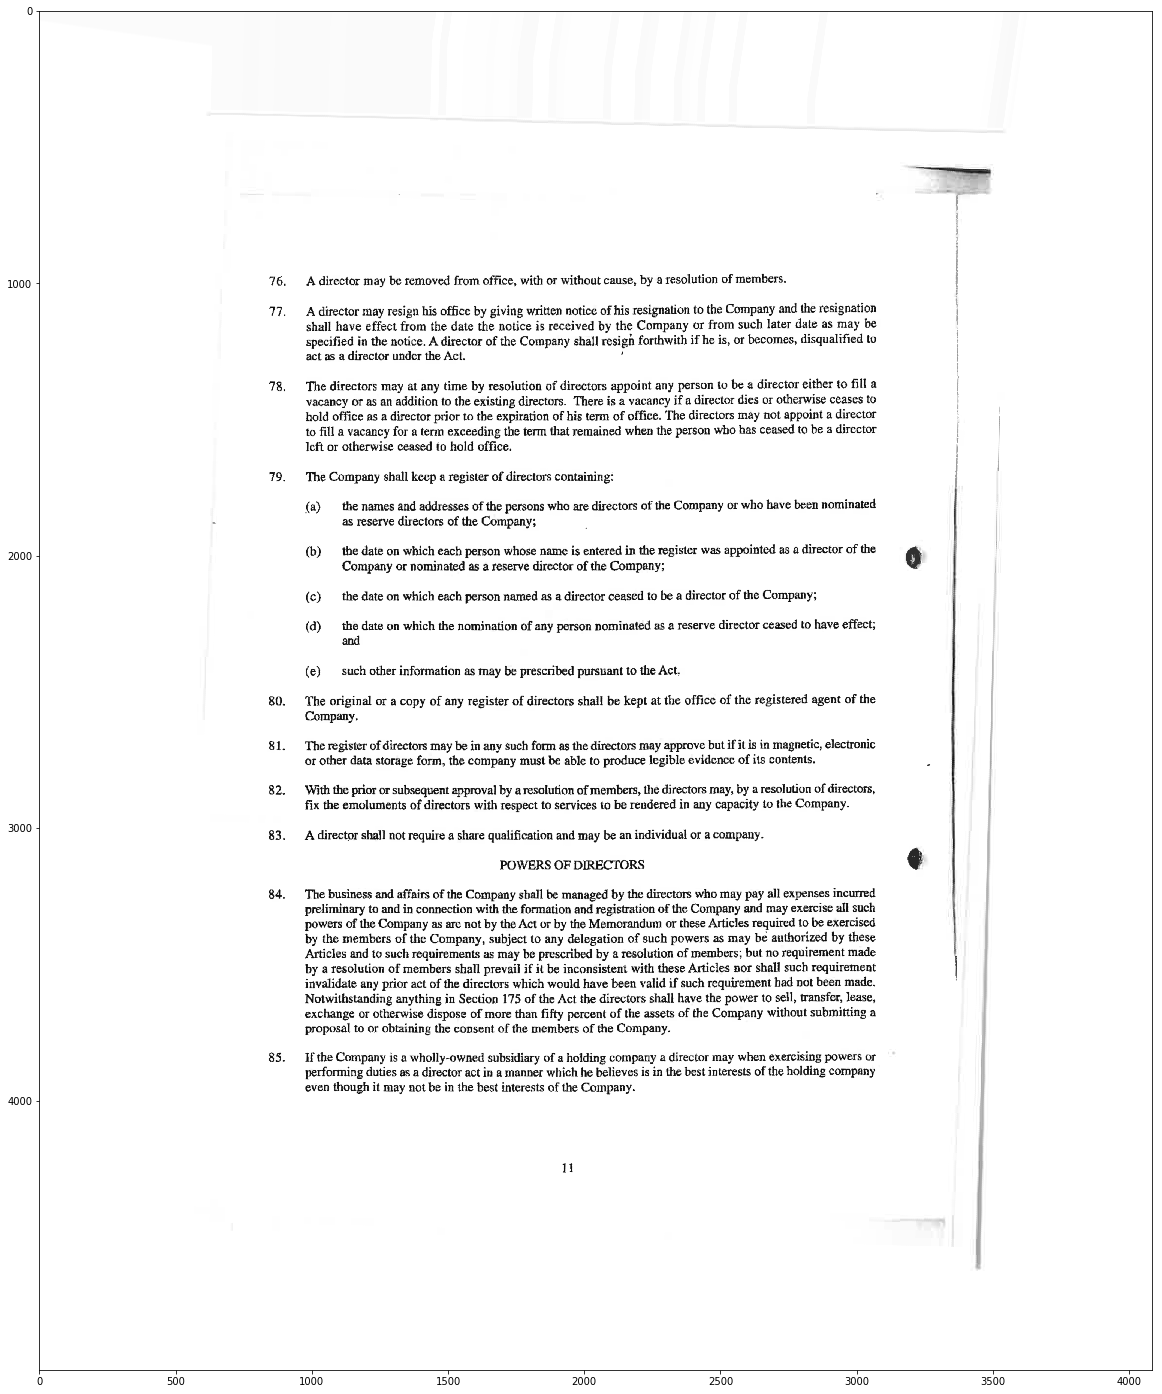

In [24]:
corrected = skt.rotate(rotated, -correctionAngle, resize=True, preserve_range=True, mode="edge")
plt.figure(figsize = (25,25))
plt.imshow(corrected, aspect='equal', cmap='gray')

In [25]:
extracted = tess.image_to_string(corrected)
print(extracted)

76.

77.

78.

79.

80.

81.

82.

83.

84.

85.

A director may be removed from office, with or without cause, by a resolution of members.

A director may resign his office by giving written notice of his resignation to the Company and the resignation
shall have effect from the date the notice is received by the Company or from such later date as may be
specified in the notice. A director of the Company shall resign forthwith if he is, or becomes, disqualified to
act as a director under the Act. ‘

The directors may at any time by resolution of directors appoint any person to be a director either to fill a
vacancy or as an addition to the existing directors. There is a vacancy if a director dies or otherwise ceases to
hold office as a director prior to the expiration of his term of office. The directors may not appoint a director
to fill a vacancy for a term exceeding the term that remained when the person who has ceased to be a director
left or otherwise ceased to hold office.

The C

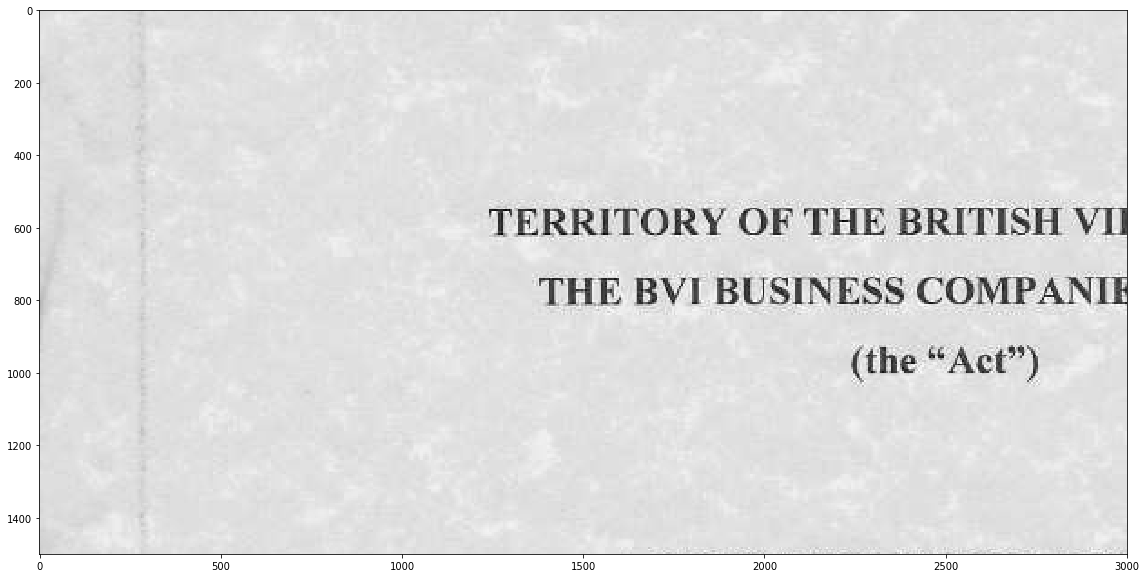

In [26]:
#adaptive thresholding
#
filename = "../training_set/THAURFIN LTD - BAD SCAN.pdf"
doc = mupdf.open(filename)
pix = doc[0].getPixmap(matrix = zoomMatrix, colorspace = "GRAY", alpha = False)
img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width)
plt.figure(figsize = (20,10))
plt.imshow(img[1000:2500, 0:3000], aspect='equal', cmap='gray')

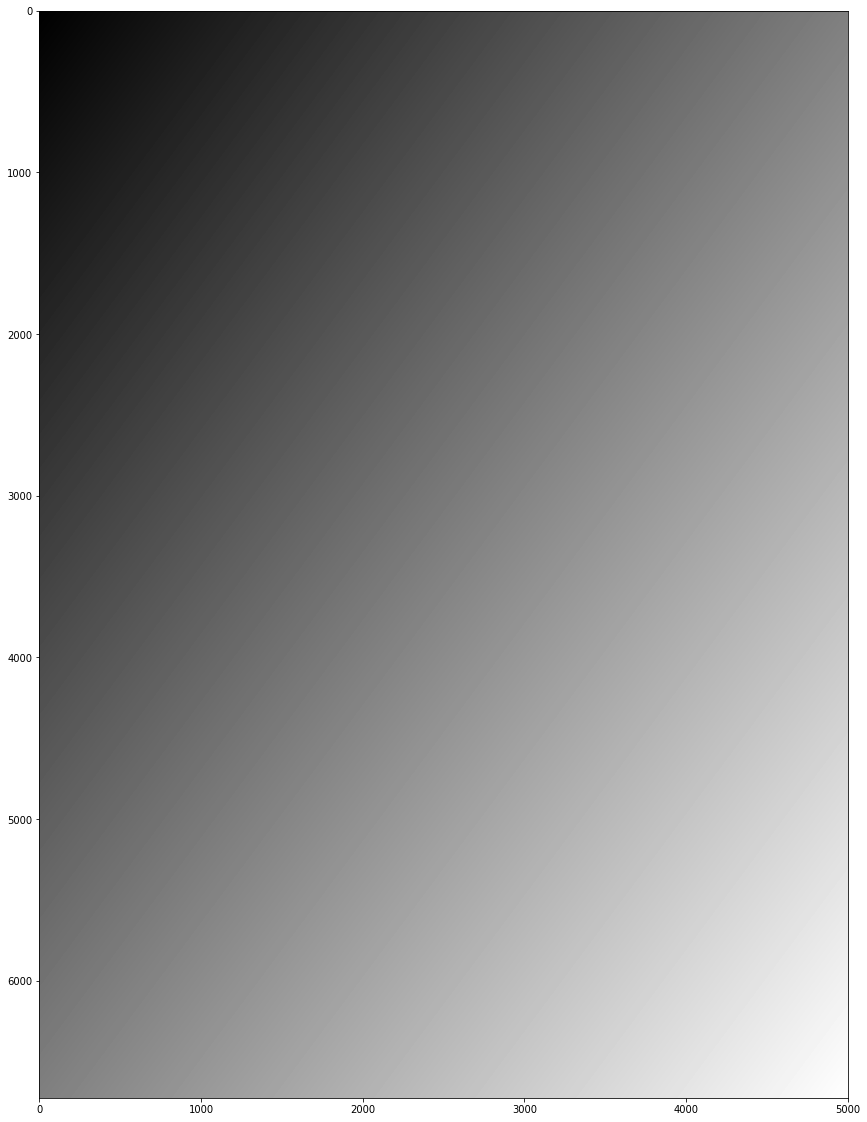

In [27]:
img.max()
maxr = img.shape[0]
maxc = img.shape[1]
shadow = np.fromfunction(lambda i, j: (i/maxr+j/maxc-1)*100, (maxr, maxc), dtype=int)

plt.figure(figsize = (20,20))
plt.imshow(shadow, aspect='equal', cmap='gray')

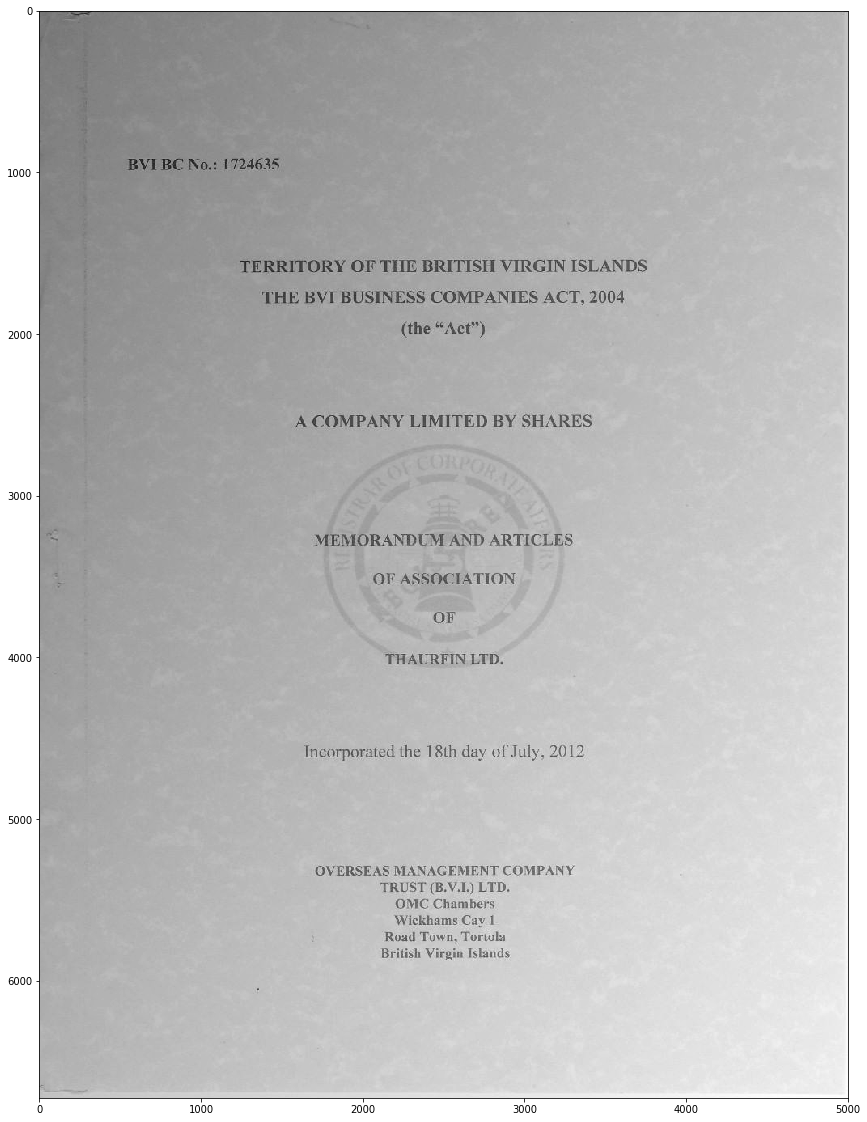

In [28]:
img_shadow = img + shadow
plt.figure(figsize = (20,20))
plt.imshow(img_shadow, aspect='equal', cmap='gray')

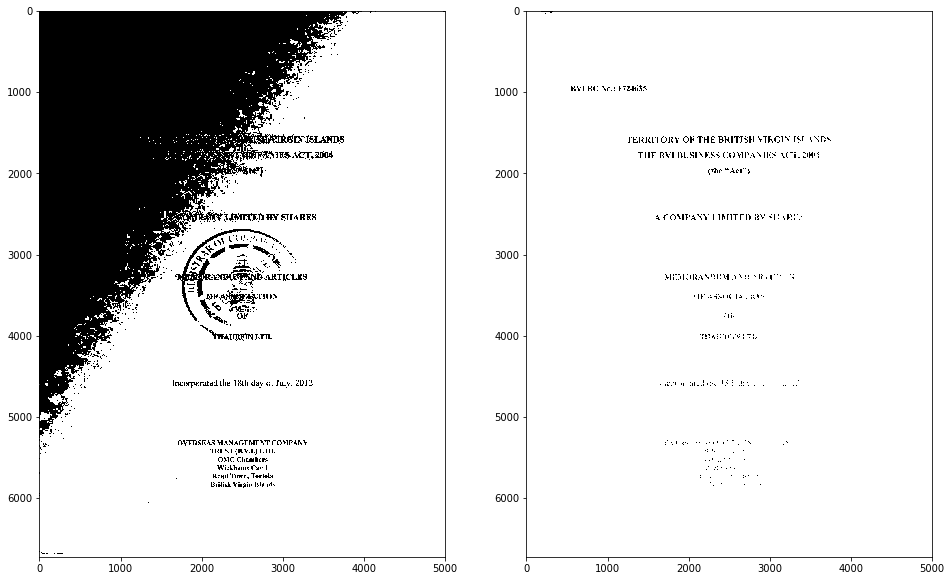

In [29]:
img_threshold1 = img_shadow > 200
img_threshold2 = img_shadow > 80
fig, subplots = plt.subplots(ncols=2, figsize = (16,16))
subplots[0].imshow(img_threshold1, aspect='equal', cmap='gray')
subplots[1].imshow(img_threshold2, aspect='equal', cmap='gray')

In [30]:
extracted = tess.image_to_string(img_shadow)
print(extracted)

=

5 ie

ee na

    
 

 

-
een Sit Poe ei ~ ee ee eer eh
z 7 7 1 i r - Seer < a :
i 4 l¥ i Lf ig kts 4
th eo ei CO TT eo eel -
a i
SP
r —=
_
Ls A

Incorporated the 18th day of July, 2012

OVERSEAS MANAGEMENT COMPANY
TRUST (B.V.L.) LTD.
OMC Chambers
Wickhams Cay |
Road Town, Tortola
British Virgin Islands


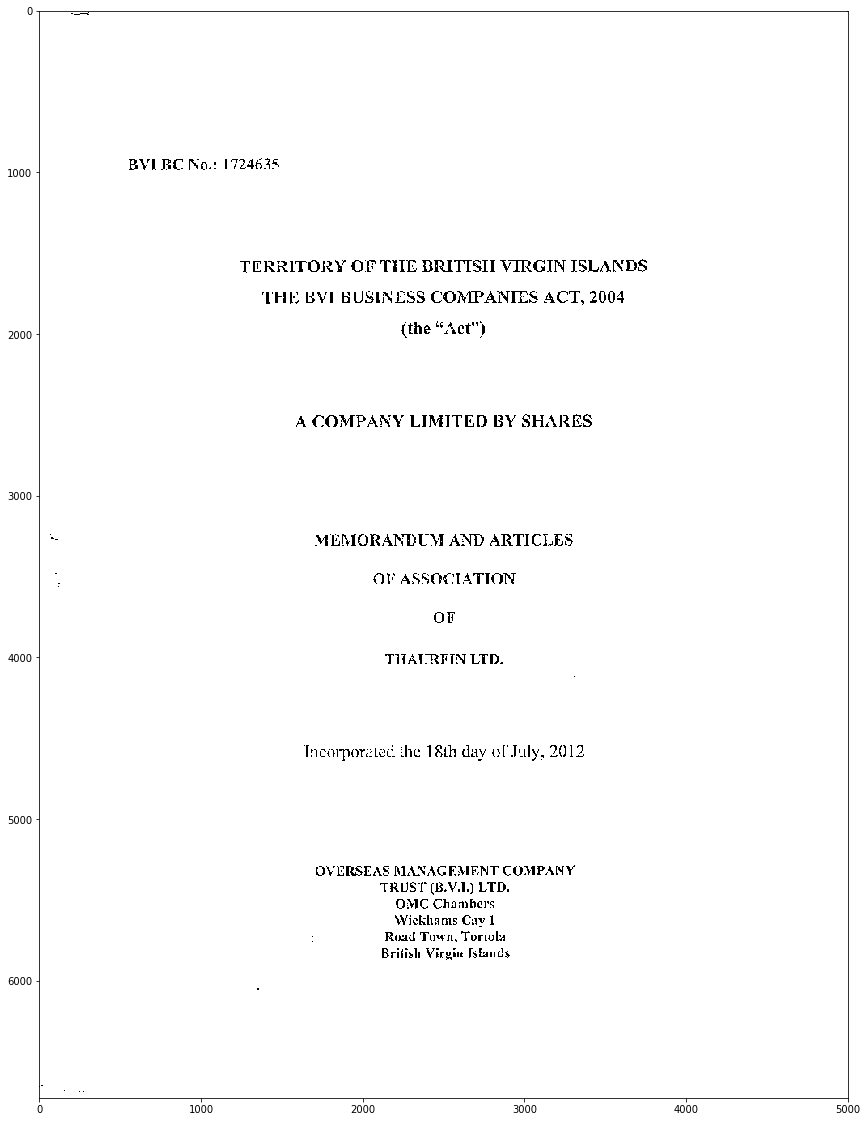

In [32]:
local_thresh = skl.threshold_local(img_shadow, block_size=65, offset=40)
img_adaptive_64 = (img_shadow > local_thresh) * 255
img_adaptive_32 = img_adaptive_64.astype(np.int32)
plt.figure(figsize = (20,20))
plt.imshow(img_adaptive_32, aspect='equal', cmap='gray')


In [33]:
extracted = tess.image_to_string(img_adaptive_32)
print(extracted)


BVI BC No.: 1724635

TERRITORY OF THE BRITISH VIRGIN ISLANDS
THE BVI BUSINESS COMPANTES ACT, 2004
{tie “ Act”)

A COMPANY LIMITED BY SHARES

MEMORANDUM AND ARTICLES
OF ASSOCIATION
OF

THAURFIN LIP.

Incorporated the 18th day of July, 2012

OVERSEAS MANAGEMENT COMPANY
TRUST (B.V.L) LTD.
OC Chambers
Wickhanis Cay I
Road Town, Portola
British Virgin Istands
